In [351]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
df = pd.read_csv("diabetes.csv")

EDA

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [354]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

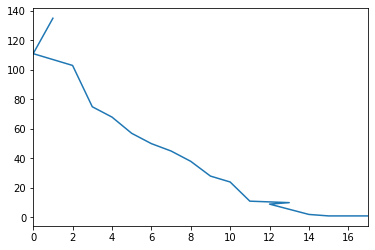

In [355]:
# Pregnancies
df.Pregnancies.value_counts().plot()

In [356]:
#Glucose
df = df.drop(df[df.Glucose == 0].index)
df.Glucose.value_counts().sort_index()

44     1
56     1
57     2
61     1
62     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Glucose, Length: 135, dtype: int64

In [357]:
#BloodPressure
df = df.drop(df[df.BloodPressure == 0].index)
df.BloodPressure.value_counts().sort_index()               

24      1
30      2
38      1
40      1
44      4
46      2
48      4
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     43
70     57
72     44
74     51
75      8
76     39
78     45
80     39
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: BloodPressure, dtype: int64

In [358]:
#SkinThickness               
df.SkinThickness.describe()         

count    728.000000
mean      21.388736
std       15.729793
min        0.000000
25%        0.000000
50%       24.000000
75%       33.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [359]:
#Insulin
df.Insulin.describe()

count    728.000000
mean      84.152473
std      116.819934
min        0.000000
25%        0.000000
50%       48.000000
75%      130.000000
max      846.000000
Name: Insulin, dtype: float64

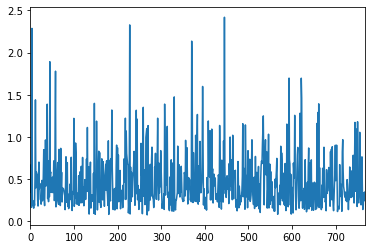

In [360]:
#DiabetesPedigreeFunction
df.DiabetesPedigreeFunction.plot()

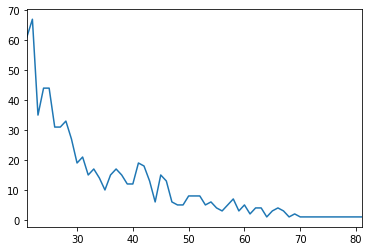

In [361]:
#Age
df.Age.value_counts().sort_index().plot()

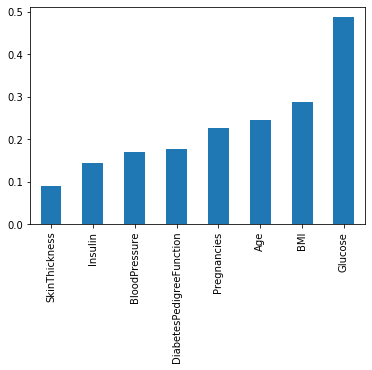

In [362]:
#Outcome
df.corr()['Outcome'][:-1].sort_values().plot(kind='bar')

Split

In [363]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [364]:
from sklearn.model_selection import train_test_split

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=8)

Scaling 

In [366]:
from sklearn.preprocessing import MinMaxScaler

In [367]:
scaler = MinMaxScaler()

In [368]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model

In [369]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [370]:
X_train.shape

(546, 8)

In [371]:
model = Sequential()
 
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [372]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

Train

In [373]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop]
         )

Train on 546 samples, validate on 182 samples
Epoch 1/600
546/546 [==============================] - 1s 2ms/sample - loss: 0.6703 - val_loss: 0.6766
Epoch 2/600
546/546 [==============================] - 0s 86us/sample - loss: 0.6641 - val_loss: 0.6748
Epoch 3/600
546/546 [==============================] - 0s 82us/sample - loss: 0.6609 - val_loss: 0.6733
Epoch 4/600
546/546 [==============================] - 0s 82us/sample - loss: 0.6628 - val_loss: 0.6718
Epoch 5/600
546/546 [==============================] - 0s 90us/sample - loss: 0.6590 - val_loss: 0.6701
Epoch 6/600
546/546 [==============================] - 0s 88us/sample - loss: 0.6559 - val_loss: 0.6685
Epoch 7/600
546/546 [==============================] - 0s 82us/sample - loss: 0.6595 - val_loss: 0.6674
Epoch 8/600
546/546 [==============================] - 0s 80us/sample - loss: 0.6416 - val_loss: 0.6658
Epoch 9/600
546/546 [==============================] - 0s 86us/sample - loss: 0.6502 - val_loss: 0.6653
Epoch 10/600
546/54

546/546 [==============================] - 0s 79us/sample - loss: 0.5564 - val_loss: 0.5839
Epoch 79/600
546/546 [==============================] - 0s 84us/sample - loss: 0.5491 - val_loss: 0.5831
Epoch 80/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5632 - val_loss: 0.5833
Epoch 81/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5579 - val_loss: 0.5835
Epoch 82/600
546/546 [==============================] - 0s 84us/sample - loss: 0.5355 - val_loss: 0.5837
Epoch 83/600
546/546 [==============================] - 0s 79us/sample - loss: 0.5482 - val_loss: 0.5816
Epoch 84/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5484 - val_loss: 0.5801
Epoch 85/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5499 - val_loss: 0.5789
Epoch 86/600
546/546 [==============================] - 0s 80us/sample - loss: 0.5422 - val_loss: 0.5790
Epoch 87/600
546/546 [==============================] - 0s 77us/samp

546/546 [==============================] - 0s 80us/sample - loss: 0.5236 - val_loss: 0.5553
Epoch 156/600
546/546 [==============================] - 0s 79us/sample - loss: 0.5124 - val_loss: 0.5545
Epoch 157/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5216 - val_loss: 0.5550
Epoch 158/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5170 - val_loss: 0.5550
Epoch 159/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5238 - val_loss: 0.5546
Epoch 160/600
546/546 [==============================] - 0s 73us/sample - loss: 0.5044 - val_loss: 0.5547
Epoch 161/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5109 - val_loss: 0.5545
Epoch 162/600
546/546 [==============================] - 0s 77us/sample - loss: 0.5297 - val_loss: 0.5541
Epoch 163/600
546/546 [==============================] - 0s 80us/sample - loss: 0.5245 - val_loss: 0.5541
Epoch 164/600
546/546 [==============================] - 0s 

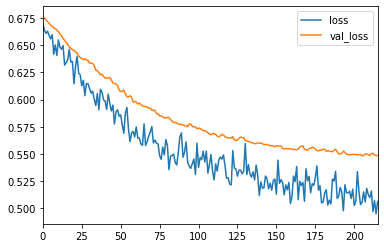

In [374]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Eval

In [375]:
predictions = model.predict_classes(X_test)

In [376]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       112
           1       0.74      0.56      0.63        70

    accuracy                           0.75       182
   macro avg       0.75      0.72      0.72       182
weighted avg       0.75      0.75      0.74       182

